# Classical Mechanics I (PHYS 311)
## Studio 14

*Name: Evan Toon*

*Date: 12-01-2025*

## Matrix Operations

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Google how to find the eigenvectors of matrices in numpy.

1. Create a (3x3) diagonal matrix, and find its eigenvectors. Make sure it's not the identity matrix.
2. Do the same for a non-diagonal 3x3 matrix.
3. Calculate a moment of inertia tensor for a system of two particles with equal mass (let's set it to 1). One at the origin, and the other at (1,1,0).
4. Find the eigenvectors of this new moment of inertia tensor. (Comment on the resulting eigenvectors!) Notice that numpy will return normalized eigen vectors.
5. Now that you have the eigenvectors, you can express your system in a coordinate system defined by these three eigenvectors. Calculate the representation of the second particle position in this new coordinate system. (Remember that the $x^\prime$ value of a vector $\vec{v}$ will just be $\vec{v}\cdot\hat{x}^{\prime}$.) You should have new descriptions of the two particle positions in this new basis.
6. Calculate the moment of inertia tensor in this new coordinate system and show that it's diagonal! i.e. the Eigenvectors of the matrix are the principle axes!

7. EC(+0.5): Use some 3D axes to draw the above operations (starting from the two-particle system). Draw the two particles in the original basis. Draw the eigenvectors of the inertia tensor and show how this process is aligning the axes to the symmetry axes of the system.

# 1. Create a (3x3) diagonal matrix, and find its eigenvectors. Make sure it's not the identity matrix.

# 2. Do the same for a non-diagonal 3x3 matrix.

In [25]:
import numpy as np

# 1.)
diag_matrix = np.matrix( [[1,0,0], [0,2,0], [0,0,3]] )
print(diag_matrix)

# Check if Identity Matrix
if np.allclose(diag_matrix, np.eye(3)):         # <-- allclose checks if each
                                                #     entry of the matrix is
                                                #     (approximately) equal to
                                                #     the identity matrix

    print("diag_matrix is the Identity Matrix")
else:
    print("diag_matrix is not the Identity Matrix")

_, diag_eigenvecs = np.linalg.eig(diag_matrix)
print("Eigenvectors:\n", diag_eigenvecs)

# --------------------------------------------------------- #

# 2.)
nondiag_matrix = np.matrix( [[1,2,3], [4,5,6], [7,8,9]] )
print(nondiag_matrix)

# Check if Identity Matrix
if np.allclose(nondiag_matrix, np.eye(3)):
    print("nondiag_matrix is the Identity Matrix")
else:
    print("nondiag_matrix is not the Identity Matrix")

_, nondiag_eigenvecs = np.linalg.eig(nondiag_matrix)
print("Eigenvectors:\n", nondiag_eigenvecs)

[[1 0 0]
 [0 2 0]
 [0 0 3]]
diag_matrix is not the Identity Matrix
Eigenvectors:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
nondiag_matrix is not the Identity Matrix
Eigenvectors:
 [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


# 3. Calculate a moment of inertia tensor for a system of two particles with equal mass (let's set it to 1). One at the origin, and the other at (1,1,0).

# 4. Find the eigenvectors of this new moment of inertia tensor. (Comment on the resulting eigenvectors!) Notice that numpy will return normalized eigen vectors.

In [26]:
# 3.)
mass_1 = 1
mass_2 = 1

r1 = np.matrix( [[0],[0],[0]] )
r2 = np.matrix( [[1],[1],[0]] )

def inertia_tensor(m, r):
    x = r[0,0]
    y = r[1,0]
    z = r[2,0]
    return m * np.matrix( [[y**2 + z**2, -x*y, -x*z], [-x*y, x**2+z**2, -y*z], [-x*z, -y*z, x**2+y**2] ])

Tensor = inertia_tensor(mass_1,r1) + inertia_tensor(mass_2,r2)
print("Moment of Inertia Tensor:\n", Tensor)

# ---------------------------------------------------------------------------- #

# 4.)
eigen_values, eigen_vectors = np.linalg.eig(Tensor)

print("Eigenvectors:\n", eigen_vectors)
print("Eigenvalues:\n", eigen_values)

# The eigenvectors represent the priciple axes of rotation. Once axis lies along
# the lines connecting the masses, and the others are perpindicular with the
# nonzero moments of inertia

Moment of Inertia Tensor:
 [[ 1 -1  0]
 [-1  1  0]
 [ 0  0  2]]
Eigenvectors:
 [[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Eigenvalues:
 [2. 0. 2.]


# 5. Now that you have the eigenvectors, you can express your system in a coordinate system defined by these three eigenvectors. Calculate the representation of the second particle position in this new coordinate system. (Remember that the $x^\prime$ value of a vector $\vec{v}$ will just be $\vec{v}\cdot\hat{x}^{\prime}$.) You should have new descriptions of the two particle positions in this new basis.
# 6. Calculate the moment of inertia tensor in this new coordinate system and show that it's diagonal! i.e. the Eigenvectors of the matrix are the principle axes!

In [27]:
# 5.)
e1 = eigen_vectors[:,0]
e2 = eigen_vectors[:,1]
e3 = eigen_vectors[:,2]

def project(r, e1, e2, e3):
    # dot product w/ each eigenvector
    x_prime = float(r.T @ e1)
    y_prime = float(r.T @ e2)
    z_prime = float(r.T @ e3)
    return np.matrix([[x_prime],[y_prime],[z_prime]])

r1_new = project(r1, e1, e2, e3)
r2_new = project(r2, e1, e2, e3)

print("\nNew r1:\n", r1_new)
print("New r2:\n", r2_new)

# ------------------------------------------------------------------------- #

# 6.)
Tensor_new = inertia_tensor(mass_1, r1_new) + inertia_tensor(mass_2, r2_new)

print("\nNew Moment of Inertia Tensor:\n", Tensor_new)


New r1:
 [[0.]
 [0.]
 [0.]]
New r2:
 [[0.        ]
 [1.41421356]
 [0.        ]]

New Moment of Inertia Tensor:
 [[2. 0. 0.]
 [0. 0. 0.]
 [0. 0. 2.]]


/tmp/ipython-input-1736132283.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_prime = float(r.T @ e1)
/tmp/ipython-input-1736132283.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_prime = float(r.T @ e2)
/tmp/ipython-input-1736132283.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z_prime = float(r.T @ e3)


# 7. EC(+0.5): Use some 3D axes to draw the above operations (starting from the two-particle system). Draw the two particles in the original basis. Draw the eigenvectors of the inertia tensor and show how this process is aligning the axes to the symmetry axes of the system.

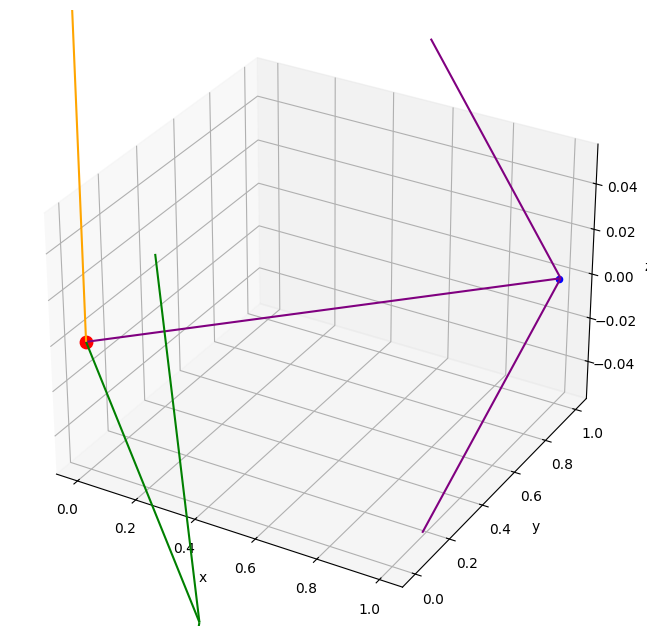

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

# Plot the particles
ax.scatter(0, 0, 0, color='red', s=80)
ax.scatter(1, 1, 0, color='blue')

# Scale the vector arrows
scale = 1.42

# Plot the eigenvectors
ax.quiver(0,0,0, e1[0,0]*scale, e1[1,0]*scale, e1[2,0]*scale, color='green')
ax.quiver(0,0,0, e2[0,0]*scale, e2[1,0]*scale, e2[2,0]*scale, color='purple')
ax.quiver(0,0,0, e3[0,0]*scale, e3[1,0]*scale, e3[2,0]*scale, color='orange')

# Axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


plt.show()